# Overview and analysis of AirBnB listings in Barcelona
In this project, we explore Airbnb listings in Barcelona, a city renowned for its tourism. With millions of annual visitors, Barcelona's popularity as a tourist destination significantly influences its hospitality sector. Airbnb, a major player in this landscape, shapes the city's lodging experience. This analysis focuses on key statistics and trends, aiming to reveal insights into the distribution, pricing dynamics, and trends of Airbnb listings across Barcelona's neighborhoods. Through data exploration, we aim to uncover patterns that provide a deeper understanding of the evolving Airbnb market in this vibrant Mediterranean city.

![Barcelona](https://media.traveler.es/photos/63838947050e0f92cd80c982/16:9/w_2560%2Cc_limit/GettyImages-1392907424.jpg)

## Structure of the notebook
1. Loading and exploring dataset
2. Cleaning dataset
3. Business analysis and visualization
4. Hypothesis testing
5. Data preprocessing
6. Prediction of listing price based on other variables

## 1. Loading and exploring dataset

In [163]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.float_format', '{:.2f}'.format)

In [164]:
# Loading dataset
data = pd.read_csv('data/cleaned/listings_cleaned.csv', parse_dates=['host_since', 'first_review'])

# Since we have 75 columns, we want pandas to display all of them
pd.set_option('display.max_columns', None)

# Exploring first 5 rows
data.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,first_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,71615,2010-01-19,within an hour,0.97,0.90,f,48.00,t,t,la Sagrada Familia,Eixample,Entire home/apt,8,2.00,3.00,6.00,202.00,1,1125,t,4,2013-05-27,4.30,t,30,0.30
1,90417,2010-03-09,within an hour,1.00,0.94,t,9.00,t,t,el Besos i el Maresme,Sant Marti,Entire home/apt,5,2.00,3.00,4.00,255.00,3,300,t,16,2011-03-15,4.77,f,2,0.48
2,567180,2011-05-08,within a few hours,0.88,0.98,f,19.00,t,f,la Sagrada Familia,Eixample,Entire home/apt,8,2.00,3.00,6.00,331.00,2,30,f,0,2011-08-09,4.55,f,19,0.33
3,135703,2010-05-31,within an hour,1.00,1.00,f,15.00,t,t,el Camp d'en Grassot i Gracia Nova,Gracia,Entire home/apt,6,1.50,2.00,3.00,171.00,21,31,t,6,2011-07-17,4.46,t,3,0.64
4,567180,2011-05-08,within a few hours,0.88,0.98,f,19.00,t,f,la Sagrada Familia,Eixample,Entire home/apt,8,2.50,3.00,5.00,333.00,2,28,f,0,2011-09-13,4.56,f,19,0.34


In [165]:
# Checking the shape of the dataframe

data.shape

(11731, 26)

In [166]:
# Checking dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11731 entries, 0 to 11730
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         11731 non-null  int64         
 1   host_since                      11731 non-null  datetime64[ns]
 2   host_response_time              11731 non-null  object        
 3   host_response_rate              11731 non-null  float64       
 4   host_acceptance_rate            11731 non-null  float64       
 5   host_is_superhost               11731 non-null  object        
 6   host_total_listings_count       11731 non-null  float64       
 7   host_has_profile_pic            11731 non-null  object        
 8   host_identity_verified          11731 non-null  object        
 9   neighbourhood_cleansed          11731 non-null  object        
 10  neighbourhood_group_cleansed    11731 non-null  object        
 11  ro

## 3. Business analysis and visualization

#### Overview of price and reviews by neighbourhood

In [167]:
neighbourhood_pivot = round(pd.pivot_table(data, index='neighbourhood_group_cleansed', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

neighbourhood_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

neighbourhood_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
neighbourhood_group_cleansed,,,,,,,
Ciutat Vella,2555,6979.00,142.17,16.00,5.00,4.54,0.00
Eixample,4396,84999.00,217.70,10.00,5.00,4.58,0.00
Gracia,1042,1500.00,162.49,13.00,5.00,4.55,0.00
Horta-Guinardo,338,1533.00,97.05,15.00,5.00,4.51,1.00
Les Corts,224,535.00,139.89,21.00,5.00,4.59,2.50
Nou Barris,108,1533.00,73.91,15.00,5.00,4.62,1.00
Sant Andreu,136,263.00,84.59,15.00,5.00,4.55,0.00
Sant Marti,1101,7000.00,171.21,9.00,5.00,4.57,0.00
Sants-Montjuic,1272,3528.00,128.53,14.00,5.00,4.54,1.00


#### Overview of price and reviews by room type

In [168]:
roomtype_pivot = round(pd.pivot_table(data, index='room_type', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

roomtype_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

roomtype_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
room_type,,,,,,,
Entire home/apt,8149,84999.00,203.92,10.00,5.00,4.55,0.00
Hotel room,94,726.00,208.15,22.00,5.00,4.62,1.00
Private room,3383,9200.00,97.12,9.00,5.00,4.57,0.00
Shared room,105,985.00,107.83,15.00,5.00,4.51,3.00


#### Overview of price and reviews by host type

In [169]:
superhost_pivot = round(pd.pivot_table(data, index='host_is_superhost', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

superhost_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

superhost_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
host_is_superhost,,,,,,,
f,8891,84999.00,172.06,9.00,5.00,4.47,0.00
t,2840,7000.00,173.02,13.00,5.00,4.83,1.00


#### How long, on average, takes hosts to receive its first review?

In [170]:
# How long does it take to get a first review

date_diff = data['first_review'] - data['host_since']
mean_date_diff = date_difference.mean().days

mean_date_diff_years = round(mean_date_diff / 365.25, 2)
print(f'On average, it takes {mean_date_diff_years} years for a host to receive his/her first review.')

On average, it takes 3.63 years for a host to receive his/her first review.


In [171]:
# Splitting dataframe into numerical and categorical columns

data_num = data.select_dtypes(include='number')
data_cat = data.select_dtypes(include='object')

In [172]:
data_num

,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,71615,0.97,0.90,48.00,8,2.00,3.00,6.00,202.00,1,1125,4,4.30,30,0.30
1,90417,1.00,0.94,9.00,5,2.00,3.00,4.00,255.00,3,300,16,4.77,2,0.48
2,567180,0.88,0.98,19.00,8,2.00,3.00,6.00,331.00,2,30,0,4.55,19,0.33
3,135703,1.00,1.00,15.00,6,1.50,2.00,3.00,171.00,21,31,6,4.46,3,0.64
4,567180,0.88,0.98,19.00,8,2.50,3.00,5.00,333.00,2,28,0,4.56,19,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11726,325879968,1.00,1.00,21.00,2,1.00,1.00,1.00,105.00,1,1125,10,5.00,17,2.00
11727,325879968,1.00,1.00,21.00,2,1.00,1.00,1.00,116.00,1,1125,2,4.50,17,2.00
11728,339646588,1.00,1.00,11.00,2,1.00,1.00,1.00,52.00,1,365,23,5.00,8,1.00
11729,325879968,1.00,1.00,21.00,2,1.00,1.00,1.00,116.00,1,1125,25,5.00,17,1.00


In [177]:
# Main summary statistics of the numerical variables

round(data_num.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
host_id,11731.00,152168351.86,169229003.88,10704.00,6251476.00,63348774.00,271226374.00,531957009.00
host_response_rate,11731.00,0.95,0.12,0.00,0.97,1.00,1.00,1.00
host_acceptance_rate,11731.00,0.91,0.17,0.00,0.91,0.99,1.00,1.00
host_total_listings_count,11731.00,48.27,90.30,1.00,4.00,11.00,47.00,1853.00
accommodates,11731.00,3.75,2.22,1.00,2.00,4.00,5.00,16.00
bathrooms_text,11731.00,1.35,0.67,0.00,1.00,1.00,2.00,10.00
bedrooms,11731.00,1.90,1.13,1.00,1.00,2.00,2.00,26.00
beds,11731.00,2.61,1.89,1.00,1.00,2.00,3.00,26.00
price,11731.00,172.29,814.48,9.00,70.00,136.00,202.00,84999.00
minimum_nights,11731.00,11.84,23.12,1.00,1.00,3.00,31.00,1125.00


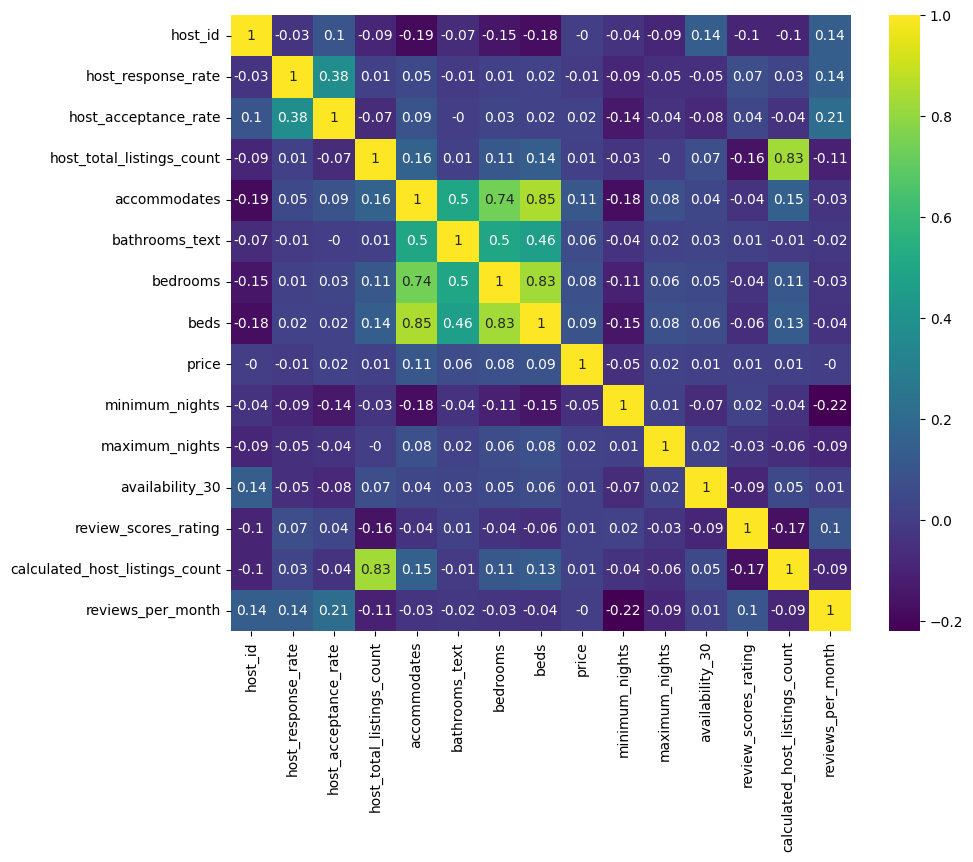

In [189]:
# Correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={"size": 10})

In [191]:
# Main summary statistics of the categorical variables

data_cat.describe().T

,count,unique,top,freq
host_response_time,11731,4,within an hour,9010
host_is_superhost,11731,2,f,8891
host_has_profile_pic,11731,2,t,11607
host_identity_verified,11731,2,t,11448
neighbourhood_cleansed,11731,69,la Dreta de l'Eixample,1616
neighbourhood_group_cleansed,11731,10,Eixample,4396
room_type,11731,4,Entire home/apt,8149
has_availability,11731,2,t,11685
instant_bookable,11731,2,f,6415


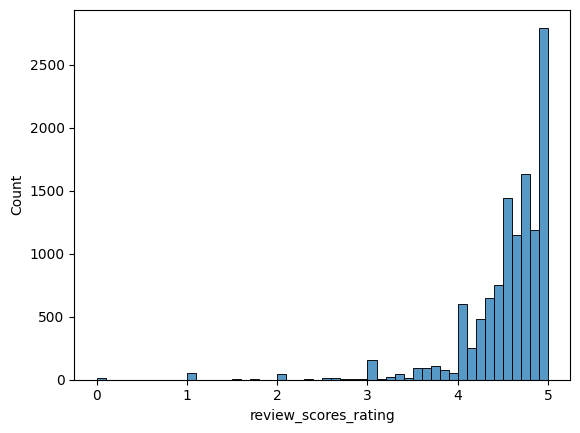

In [197]:
# Overall reviews distribution

sns.histplot(data['review_scores_rating'], bins=50)
plt.show()

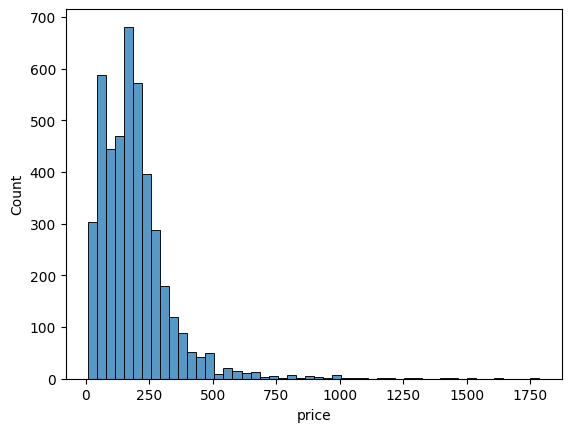

In [214]:
# Price histogram for Eixample

sns.histplot(data[(data['price'] < 2000) & (data['neighbourhood_group_cleansed'] == 'Eixample')]['price'], bins=50)
plt.show()

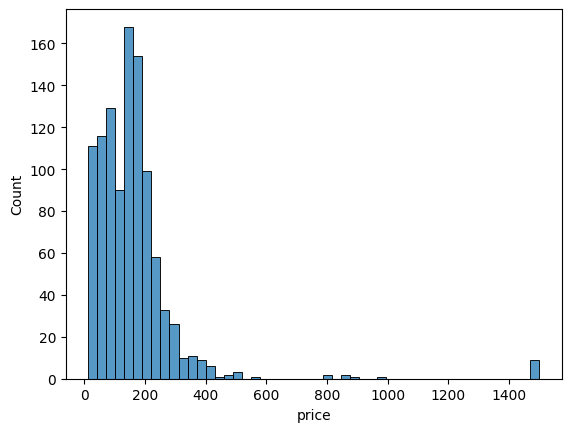

In [215]:
# Price histogram for Gracia

sns.histplot(data[(data['price'] < 2000) & (data['neighbourhood_group_cleansed'] == 'Gracia')]['price'], bins=50)
plt.show()

In [ ]:
# Skewness

## 4. Hypothesis testing

#### Is the average price in Gracia neighborhood significantly different from Sants-Montjuic?

#### Is the average rating in Sant Andreu higher than 4.50?

#### Is the average number of listings per host less than 30?

#### Are xyz categorical columns correlated?

#### Is the average number of bedrooms for listings in Ciutat Vella significantly different from 3?

## 5. Data preprocessing

In [176]:
# Remember to remove nulls from relevant columns

## 6. Predicting the price of listings